In [1]:
import pandas as pd
import seaborn as sns
import statistics  as sts
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
#importando dados
df = pd.read_csv("train.csv")
df.shape

(13730, 167)

In [3]:
#visulizar
df.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [33]:
#selecionando as vas númericas só para verificar valores nulos
df_num = df.select_dtypes(np.number)
#df_num.isnull().sum()
#Criando um dataframe auxliar para analisar a consistencia das variaveis
cons = pd.DataFrame({'colunas' : df_num.columns,
                    'tipo': df_num.dtypes,
                    'missing' : df_num.isna().sum(),
                    'size' : df_num.shape[0],
                    'unicos': df_num.nunique()})
cons['percentual'] = round(cons['missing'] / cons['size'],2)

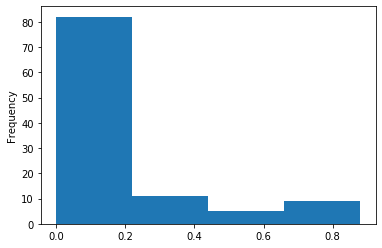

In [6]:
cons.percentual.plot.hist( bins = 4)#mostrando quantas vas tem de percentual de missings

In [34]:
#Subseting com as vas que podem influenciar na nota de matemática
subset = df_num[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']]
subset.head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,581.2,495.4,436.3,399.4,520.0,120.0,120.0,120.0,80.0,80.0
1,599.0,544.1,474.5,459.8,580.0,140.0,120.0,120.0,120.0,80.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#Removendo os nulos
subset = subset.dropna()

In [36]:
subset.isnull().sum()

NU_NOTA_LC         0
NU_NOTA_CH         0
NU_NOTA_CN         0
NU_NOTA_MT         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
dtype: int64

In [37]:
subset.shape

(10097, 10)

NU_NOTA_LC


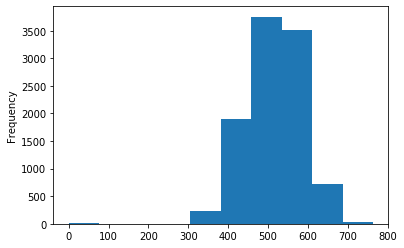

NU_NOTA_CH


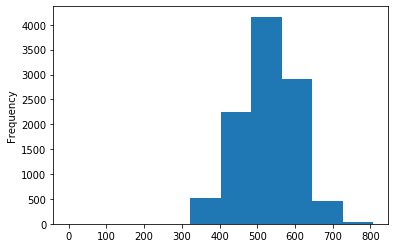

NU_NOTA_CN


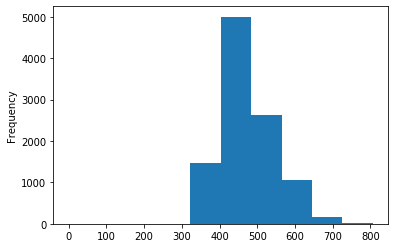

NU_NOTA_MT


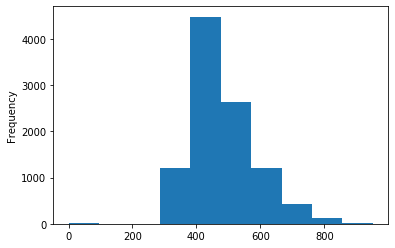

NU_NOTA_REDACAO


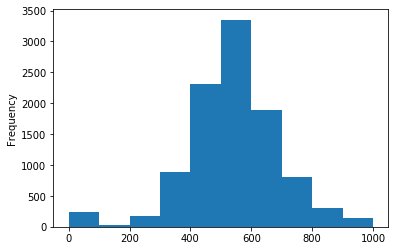

NU_NOTA_COMP1


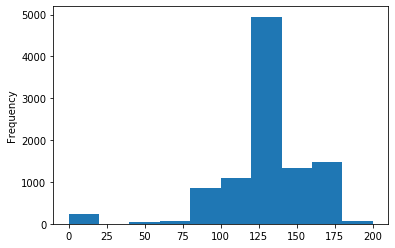

NU_NOTA_COMP2


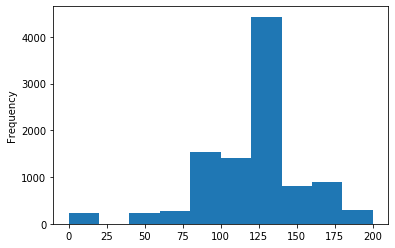

NU_NOTA_COMP3


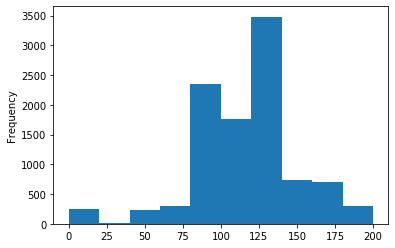

NU_NOTA_COMP4


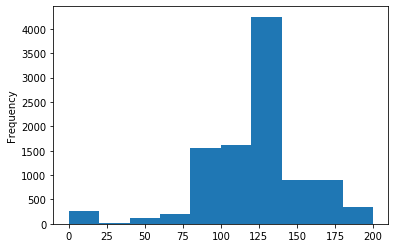

NU_NOTA_COMP5


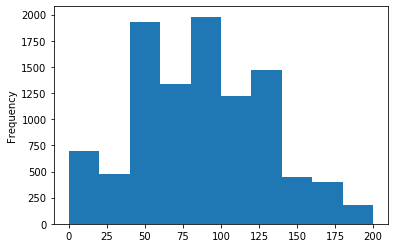

In [9]:
#análise univariada
for coluna in subset:
    print(coluna)
    df[coluna].plot.hist(bins = 10)
    plt.show()

In [38]:
desv = subset.std()
mean = subset.mean()

In [39]:
#removendo outliers
subset_out = subset[~((subset  <=  (mean - 2 * desv)) |(subset  >=  (mean + 2 * desv))).any(axis=1)]
subset_out.shape

(8183, 10)

In [12]:
#correlação com outl
corr = subset.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_LC,1.00,0.69,0.55,0.49,0.51,0.43,0.45,0.48,0.47,0.44
NU_NOTA_CH,0.69,1.00,0.61,0.53,0.55,0.44,0.49,0.51,0.49,0.49
NU_NOTA_CN,0.55,0.61,1.00,0.58,0.46,0.36,0.41,0.43,0.41,0.42
NU_NOTA_MT,0.49,0.53,0.58,1.00,0.38,0.30,0.34,0.35,0.34,0.34
NU_NOTA_REDACAO,0.51,0.55,0.46,0.38,1.00,0.86,0.92,0.93,0.91,0.82
NU_NOTA_COMP1,0.43,0.44,0.36,0.30,0.86,1.00,0.76,0.76,0.82,0.56
NU_NOTA_COMP2,0.45,0.49,0.41,0.34,0.92,0.76,1.00,0.87,0.81,0.66
NU_NOTA_COMP3,0.48,0.51,0.43,0.35,0.93,0.76,0.87,1.00,0.83,0.66
NU_NOTA_COMP4,0.47,0.49,0.41,0.34,0.91,0.82,0.81,0.83,1.00,0.63
NU_NOTA_COMP5,0.44,0.49,0.42,0.34,0.82,0.56,0.66,0.66,0.63,1.00


### A retirada dos outliers  piorou a correlação

In [13]:
#correlação sem outl
corr = subset_out.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
NU_NOTA_LC,1.00,0.62,0.42,0.35,0.42,0.34,0.33,0.35,0.34,0.32
NU_NOTA_CH,0.62,1.00,0.47,0.38,0.45,0.34,0.37,0.38,0.35,0.37
NU_NOTA_CN,0.42,0.47,1.00,0.38,0.33,0.24,0.28,0.29,0.26,0.26
NU_NOTA_MT,0.35,0.38,0.38,1.00,0.25,0.18,0.20,0.21,0.19,0.20
NU_NOTA_REDACAO,0.42,0.45,0.33,0.25,1.00,0.74,0.83,0.85,0.82,0.77
NU_NOTA_COMP1,0.34,0.34,0.24,0.18,0.74,1.00,0.55,0.57,0.66,0.38
NU_NOTA_COMP2,0.33,0.37,0.28,0.20,0.83,0.55,1.00,0.74,0.63,0.49
NU_NOTA_COMP3,0.35,0.38,0.29,0.21,0.85,0.57,0.74,1.00,0.66,0.50
NU_NOTA_COMP4,0.34,0.35,0.26,0.19,0.82,0.66,0.63,0.66,1.00,0.46
NU_NOTA_COMP5,0.32,0.37,0.26,0.20,0.77,0.38,0.49,0.50,0.46,1.00


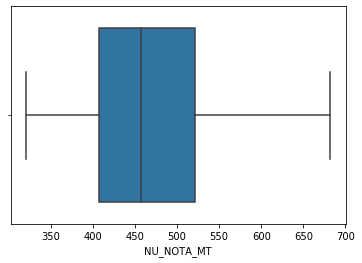

In [35]:
sns.boxplot(subset_out['NU_NOTA_MT'])

Text(0.5, 1.0, 'NU_NOTA_MT')

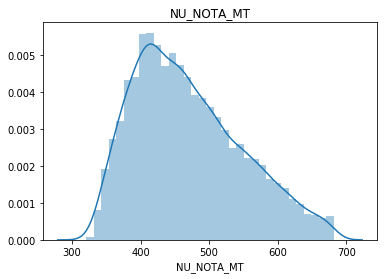

In [38]:
sns.distplot(subset_out['NU_NOTA_MT']).set_title('NU_NOTA_MT')

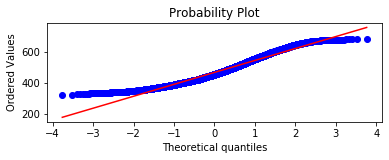

In [44]:
import scipy.stats as sct
fig = plt.figure()
ax2 = fig.add_subplot(212)
prob = sct.probplot(subset_out['NU_NOTA_MT'], dist=sct.norm, plot=ax2)
plt.show()

In [45]:
#a va resposta precisa seguir uma distribuição normal
#testando
#NU_NOTA_MT possui dist normal?
dagostino_stats, dagostino_p_valor = sct.normaltest(subset_out['NU_NOTA_MT'])
bool(dagostino_p_valor > 0.05)

False

In [56]:
subset.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_LC,10097.0,516.665059,68.442602,0.0,468.600000,521.100000,564.900000,763.600000
NU_NOTA_CH,10097.0,530.346123,73.528309,0.0,481.000000,532.600000,581.900000,807.000000
NU_NOTA_CN,10097.0,473.912509,71.098468,0.0,420.100000,460.400000,515.100000,806.400000
NU_NOTA_MT,10097.0,482.648638,99.685820,0.0,409.000000,461.300000,537.700000,952.000000
NU_NOTA_REDACAO,10097.0,529.452907,154.001881,0.0,440.000000,540.000000,600.000000,1000.000000
NU_NOTA_COMP1,10097.0,119.880361,29.770060,0.0,120.000000,120.000000,140.000000,200.000000
NU_NOTA_COMP2,10097.0,111.998019,33.676266,0.0,100.000000,120.000000,120.000000,200.000000
NU_NOTA_COMP3,10097.0,106.906012,34.294586,0.0,80.000000,120.000000,120.000000,200.000000
NU_NOTA_COMP4,10097.0,113.210360,33.413072,0.0,100.000000,120.000000,120.000000,200.000000
NU_NOTA_COMP5,10097.0,77.458156,43.057358,0.0,40.000000,80.000000,100.000000,200.000000


In [47]:
subset_out.describe().T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_LC,8183.0,515.705939,57.539705,379.8,474.75,520.7,558.9,653.3
NU_NOTA_CH,8183.0,528.081694,60.277769,383.3,485.70,531.0,573.6,676.8
NU_NOTA_CN,8183.0,464.907063,57.506983,344.8,419.60,456.7,503.5,615.5
NU_NOTA_MT,8183.0,469.243126,78.554627,320.5,407.75,457.1,521.0,682.0
NU_NOTA_REDACAO,8183.0,534.263962,101.346721,240.0,460.00,540.0,600.0,820.0
NU_NOTA_COMP1,8183.0,121.989246,20.196998,67.0,120.00,120.0,140.0,160.0
NU_NOTA_COMP2,8183.0,113.467432,22.724819,60.0,100.00,120.0,120.0,160.0
NU_NOTA_COMP3,8183.0,107.836979,23.894436,40.0,80.00,120.0,120.0,160.0
NU_NOTA_COMP4,8183.0,114.305267,22.753167,60.0,100.00,120.0,120.0,180.0
NU_NOTA_COMP5,8183.0,76.665037,37.062347,0.0,40.00,80.0,100.0,160.0


### Parece que nenhuma transformação e nem a retirada de outliers faz com que a distribuição da va resposta se aproxime da dist notmal.

### O Teorema do Limite Central afirma que a distribuição das médias se torna uma distribuição normal padrão à medida que o tamanho da amostra aumenta. Logo vou afroxar as regras me baseando no TLC e vou aplicar regressão linear.

In [40]:
#importando dados de teste
df1 = pd.read_csv("test.csv")
df1.head()

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,NaN,NaN,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [79]:
df1.shape

(4576, 47)

In [80]:
#Removendo os nulos
df1= df1.dropna()

In [82]:
df1.isnull().sum()

NU_INSCRICAO              0
CO_UF_RESIDENCIA          0
SG_UF_RESIDENCIA          0
NU_IDADE                  0
TP_SEXO                   0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO                 0
IN_TREINEIRO              0
TP_DEPENDENCIA_ADM_ESC    0
IN_BAIXA_VISAO            0
IN_CEGUEIRA               0
IN_SURDEZ                 0
IN_DISLEXIA               0
IN_DISCALCULIA            0
IN_SABATISTA              0
IN_GESTANTE               0
IN_IDOSO                  0
TP_PRESENCA_CN            0
TP_PRESENCA_CH            0
TP_PRESENCA_LC            0
CO_PROVA_CN               0
CO_PROVA_CH               0
CO_PROVA_LC               0
CO_PROVA_MT               0
NU_NOTA_CN                0
NU_NOTA_CH                0
NU_NOTA_LC                0
TP_LINGUA                 0
TP_STATUS_REDACAO         0
NU_NOTA_COMP1             0
NU_NOTA_COMP2             0
NU_NOTA_COMP3       

In [83]:
df1_num = df1.select_dtypes(np.number)

In [84]:
#Subseting de teste com as vas que podem influenciar na nota de matemática
sub_test = df1_num[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']]
sub_test.head()

,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
8,548.6,577.6,414.4,740.0,120.0,160.0,160.0,140.0,160.0
40,520.3,563.5,477.2,500.0,100.0,120.0,100.0,120.0,60.0
43,516.4,525.9,438.9,440.0,100.0,100.0,100.0,120.0,20.0
49,534.4,505.8,435.8,500.0,100.0,120.0,80.0,100.0,100.0
71,471.8,522.2,396.1,440.0,120.0,100.0,80.0,100.0,40.0


### Regressão com outliers

In [85]:
#vamos separar vas dependentes da independente
cols = ['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']
X_train = subset[cols] 
y_train = subset.NU_NOTA_MT

In [48]:
from sklearn.linear_model import LinearRegression

In [86]:
#criando e treinando o modelo
lreg = LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
#obtendo as previsões
NU_NOTA_MT = lreg.predict(sub_test)

### Árvore de Regressão

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
#criando e treinando o modelo
arvore = DecisionTreeRegressor(random_state=0)  
arvore.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [90]:
#obtendo as previsões
NU_NOTA_MT1 = arvore.predict(sub_test)

### Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [100]:
NU_NOTA_MT2 = random_forest.predict(sub_test)
NU_NOTA_MT2=np.around(NU_NOTA_MT2,2)
NU_NOTA_MT2

array([498.69, 464.14, 449.38, 472.79, 414.57, 449.06, 545.57, 585.16,
       516.69, 443.28, 482.51, 500.71, 461.56, 414.66, 448.31, 481.15,
       542.09, 448.58, 459.42, 428.81, 468.88, 456.09, 438.16, 432.87,
       442.73, 432.72, 453.85, 576.55, 456.88, 459.42, 420.37, 476.84,
       424.21, 478.52, 501.17, 443.39, 478.33, 519.78, 435.78, 468.85,
       441.61, 454.43, 550.82, 411.71, 499.37, 451.91, 623.93, 490.11,
       506.71, 450.58, 465.04, 568.8 , 490.09, 455.57, 413.17, 506.22,
       542.52, 557.77, 425.52, 506.6 , 447.38, 512.85, 451.76, 436.42,
       476.87, 479.21, 473.43, 457.27, 468.14, 439.97, 491.55, 488.71,
       426.05, 444.87, 441.91, 446.07, 431.81, 419.52, 487.  , 433.2 ,
       446.71, 492.44, 446.32, 452.33, 482.49, 538.87, 428.18, 452.83,
       423.28, 458.7 , 490.2 , 434.03, 417.83, 463.25, 475.61, 431.94,
       468.45, 484.36, 438.63, 459.93, 479.5 , 416.91, 467.39, 477.3 ,
       438.4 , 450.08, 459.89, 534.71, 535.42, 535.32, 416.63, 457.09,
      

### Comparando as previsões

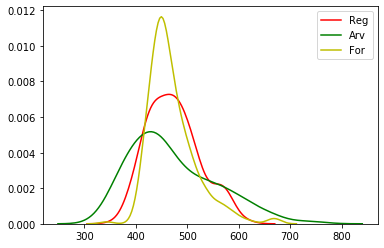

In [93]:
sns.distplot(NU_NOTA_MT, color='r', label='Reg', hist=False)
sns.distplot(NU_NOTA_MT1, color='g', label='Arv', hist=False) 
sns.distplot(NU_NOTA_MT2, color='y', label='For', hist=False)
plt.show()

### Gerando as respostas


In [102]:
pred = pd.DataFrame({"NU_INSCRICAO": df1["NU_INSCRICAO"], "NU_NOTA_MT": NU_NOTA_MT2})
pred.to_csv("answer.csv", index = False)